In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

plt.rcParams['figure.figsize'] = (14,8)

## HW I.
   1. Скачайте текст войны и мир (ссылка на github и гугл диск). 
   1. Очистите его, оставив только русские буквы и символы пробела. 
   1. Постройте матрицу переходных вероятностей. 
   1. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; 
   1. Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
   
## HW II.
Выберите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.


## HW I.

In [77]:
#Очистите, оставив только русские буквы и символы пробела. 
# ОБРАЩАЮ ВНИМАНИЕ! в задании указано учитывать пробел

with open('Series/tom_1.txt','r', encoding="utf8") as f:
    text_rus = f.read().lower()
    f.close()
text_rus = re.sub('[^а-яА-Я ]','', text_rus)

In [79]:
import os

In [90]:
text_rus = str()

for file in os.listdir('./Series/'):
    print('Reading: ',file)
    with open('./Series/'+file,'r', encoding="utf8") as f:
        text = f.read().lower()
        f.close()
    text = re.sub('[^а-яА-Я ]','', text)  
    
    text_rus += text
    print('Done!')

Reading:  tom_1.txt
Done!
Reading:  tom_2.txt
Done!
Reading:  tom_3.txt
Done!
Reading:  tom_4.txt
Done!


In [91]:
text_rus[:56]

'лев толстойвойна и миртом   том часть перваячасть ораяча'

In [ ]:
#Постройте матрицу переходных вероятностей.

In [22]:
# Так как в задании указано учитывать пробел
# То матрица переходов должна содержать пробел
# В итоге получается граф, в котором вершины - это символы, а ребра - это вероятности (transition probabilities)

russian = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
word_number_dict = dict()
word_number_dict = {word:i for i,word in enumerate([j for j in russian])}

In [23]:
# transistion probability matrix
probabilities_in_text_rus = np.zeros((len(russian),len(russian)))

In [95]:
# filling transistion probability matrix
for i,j in zip(text_rus[1:],text_rus[:-1]):
    probabilities_in_text_rus[word_number_dict[i],word_number_dict[j]] +=1

<AxesSubplot:>

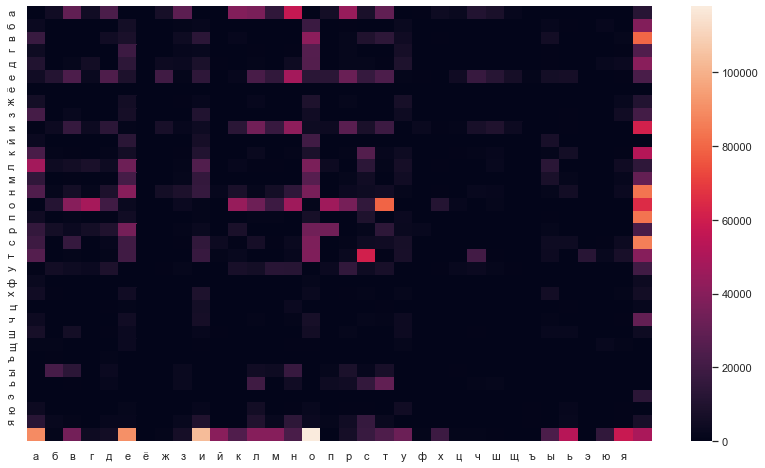

In [96]:
# буква под номером №6 [ё] отсутствует в тексте. заменим ряд нулями.. 
sns.heatmap(probabilities_in_text_rus, 
            xticklabels=[j for j in russian],yticklabels=[j for j in russian])

<ipython-input-98-d04b5c15901e>:2: RuntimeWarning: invalid value encountered in true_divide
  probabilities_in_text_rus = probabilities_in_text_rus/probabilities_in_text_rus.sum(axis=1).reshape(-1,1)


<AxesSubplot:>

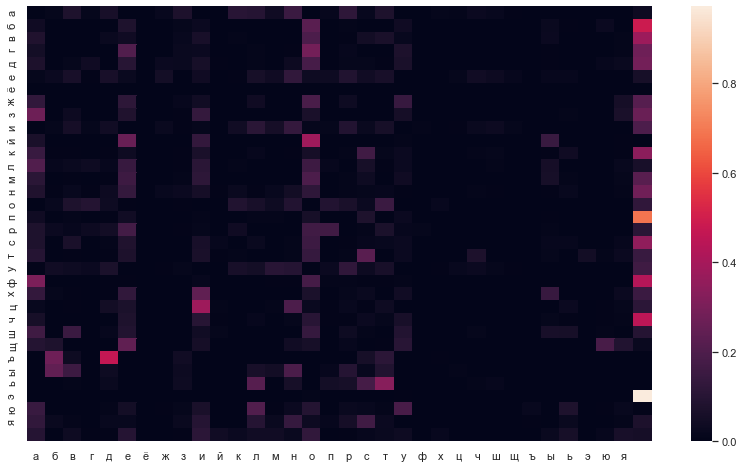

In [98]:
# making transistion ratio
probabilities_in_text_rus = probabilities_in_text_rus/probabilities_in_text_rus.sum(axis=1).reshape(-1,1)
probabilities_in_text_rus[6] = 0
sns.heatmap(probabilities_in_text_rus, 
            xticklabels=[j for j in russian],yticklabels=[j for j in russian])

In [ ]:
#Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р;

In [67]:
def generate(array):
    '''
        добавит к каждому элементу массива 'array' каждую букву алфавита. 
        Увеличит длину массива в 34 раза 
    '''
    new_array = []
    for i in range(len(array)):    
        for j in russian:
            new_array.append(''.join((array[i],j)))

    return new_array

In [68]:
def generate_array(length = 4):
    '''
        создаст массив из всех возможных вариатов строк длиной 'length' символов  
        длина массива будет равна 34**length
    '''
    array = list(russian)
    
    for i in range(length-1):
        array = generate(array)
        
    return array

In [76]:
# создадим массив из всех возможных сочетаний из 2 символов. их должно быть len(russian)**2 или 34**2
array_2 = generate_array(2)
array_2[:7], len(array_2), 34**2

(['аа', 'аб', 'ав', 'аг', 'ад', 'ае', 'аё'], 1156, 1156)

In [65]:
def get_proba(string):
    '''
        Посчитает вероятность получить такую строчку 'string' в тексте.
    '''
    first_letter_probability = 1/len(russian)
    probability = first_letter_probability
    for i,j in zip(string[1:],string[:-1]):
        probability *= probabilities_in_text_rus[word_number_dict[i] ,word_number_dict[j] ]
    return probability

In [103]:
# Если прдставить граф в котором вершины - это символы, а ребра - это вероятности (transition probabilities)
# То искомое задачи - это сумма ребер всех путей из 4 вершин, в котором первая вершина 'п' а последняя вершина 'р',

start_node = 'п'
end_node = 'р'

steps = 2
array_2 = generate_array(steps)

array = [start_node+i+end_node for i in array_2]

probability = 0
probabilities_array = []

for word in array:
    probabilities_array.append(get_proba(word))
    probability += probabilities_array[-1]

probabilities_array = np.array(probabilities_array)
probability

0.0005644270471877695

In [104]:
# Это сумма ребер для каждого пути из 4 вершин, 
# Другими словами, все варианты из 4 символов и их вероятности.

pd.Series(data=probabilities_array,index=array).sort_values(ascending=False)

прер    0.000071
прор    0.000054
прар    0.000044
по р    0.000036
потр    0.000025
          ...   
пйцр    0.000000
пйчр    0.000000
пйшр    0.000000
пйщр    0.000000
пшгр    0.000000
Length: 1156, dtype: float64

Чаще всего употребляется слово 'прер'

In [121]:
# Сумма ребер пути с вершинами 'п' 'ь' 'е' 'р'
# Вероятность из всего текста получить слово 'пьер'
a= get_proba("пьер")*100

print(f'Вероятность из всего текста получить слово "пьер" = { a:.5f} %')
print(f'Вероятность из всех строк длиной 4 получить слово "пьер" = { a/probability:.2f} %')

Вероятность из всего текста получить слово "пьер" = 0.00046 %
Вероятность из всех строк длиной 4 получить слово "пьер" = 0.82 %


In [ ]:
#Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [130]:
probabilities_in_text_rus[ word_number_dict[ word[-1] ] ][:-1]/ sum(probabilities_in_text_rus[ word_number_dict[ word[-1] ] ][:-1])

array([8.03433699e-02, 1.17007444e-03, 2.24258852e-03, 0.00000000e+00,
       4.29017687e-03, 1.48010871e-01, 0.00000000e+00, 7.06903029e-03,
       2.25721183e-02, 5.56748778e-02, 1.80383681e-03, 1.46259305e-04,
       3.26638270e-03, 3.36385396e-03, 1.46256423e-03, 4.43447438e-01,
       0.00000000e+00, 1.92569921e-02, 6.33775473e-03, 3.85141206e-03,
       7.54192027e-02, 4.87513547e-05, 1.95008039e-04, 0.00000000e+00,
       4.87513547e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.67046364e-02, 1.28217924e-02, 0.00000000e+00, 5.47970390e-02,
       5.65521742e-03])

In [134]:
def gen_word(first_node='б', length = 8 ):
    word = [first_node]
    russian_letters = [i for i in russian if i not in ' ']
    for i in range(length-1):
        prob = probabilities_in_text_rus[ word_number_dict[ word[-1] ] ][:-1]
        word.append(np.random.choice(russian_letters,p=prob/sum(prob)  ) )

    return ''.join(word)

In [137]:
for i in range(7):
    print(gen_word() )

боленнан
ботогацд
боросьта
бынарпеп
бесынтсв
бушокуке
бешватяа


## HW II.
Выберите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [172]:
df = pd.read_csv('../HW_5/Stock_Exchange_Data/indexData.csv')

In [173]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [174]:
pd.read_csv('../HW_5/Stock_Exchange_Data/indexInfo.csv').head()

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
4,Japan,Tokyo Stock Exchange,N225,JPY


In [175]:
# We will use 'New York Stock Exchange' prices ('NYA')
nya = pd.DataFrame( df[df.Index == 'NYA'] )
nya.reset_index(drop=True,inplace=True)
nya.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [176]:
# Make average for series:
nya['Average'] = nya.apply( lambda x: (x.High + x.Low)/2 ,axis=1)

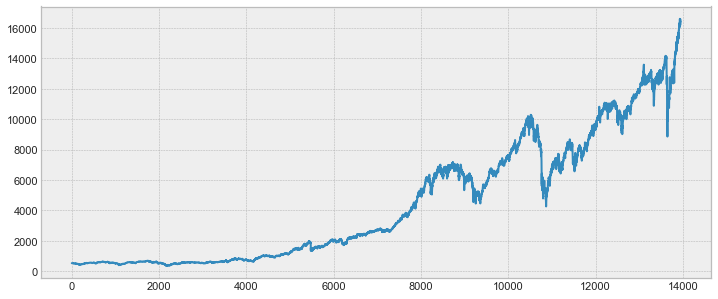

In [177]:
series = nya.Average
del nya
series = np.array(series)
with plt.style.context(style='bmh'):
    fig = plt.figure(figsize=(12,5))
    plt.plot(series)

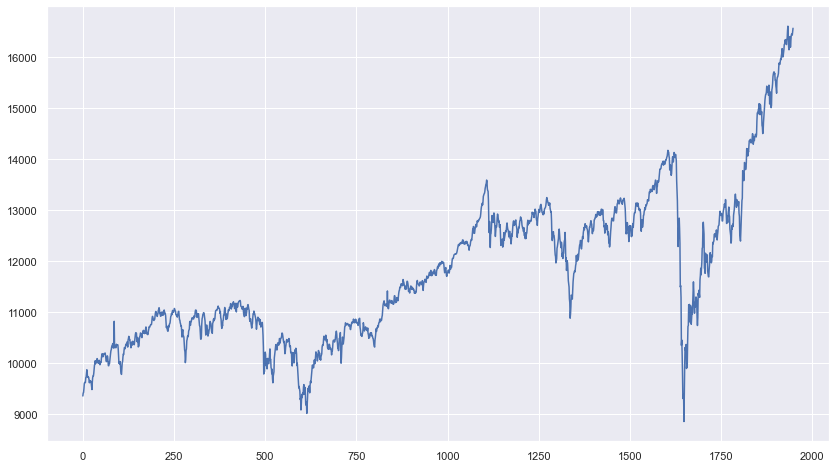

In [178]:
plt.plot(series[12000:])
old_series, series = series, series[12000:]

In [160]:
from hmmlearn.hmm import GaussianHMM

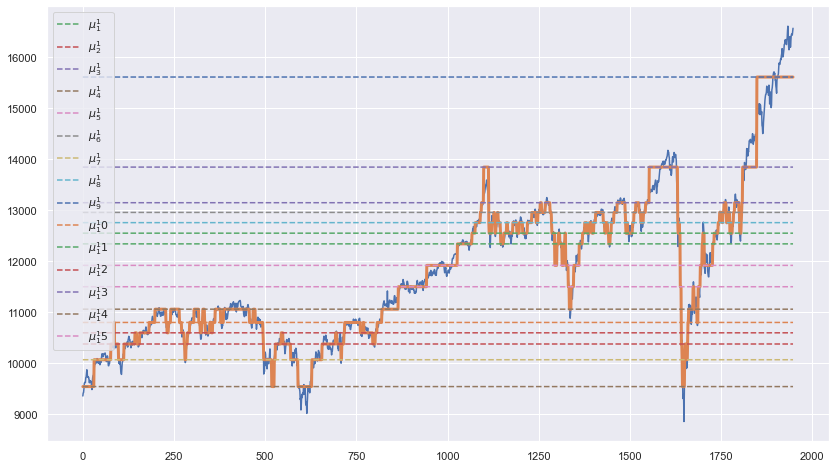

In [182]:
model = GaussianHMM(n_components=15,
                        covariance_type="diag",
                        n_iter=1000)
values = series.reshape(-1,1)
model.fit(values)

labels = model.predict(values)
means = np.zeros_like(values)

for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
#plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

for i in range(model.n_components):
    plt.plot( range(len(values)), model.means_[i, 0] * np.ones(len(values)), '--', label='$\mu^1_{}$'.format(i+1))
plt.legend()

Такой ряд не подойдет для поиска скрытых переменных - так как в одной точке (например 15 000) ряд был всего один раз, а это будет мало для построения матрицы переходов. 

То есть, вершина '15 000' графа имеет только два ребра(себя и до неё) - а этого явно не достаточно для хоть какого то прогноза.  

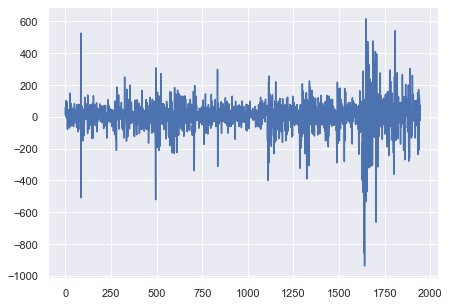

In [183]:
# Дифференцируем на 1
plt.figure(figsize=(7, 5))
plt.plot(series[1:]-series[:-1])
series = series[1:]-series[:-1]

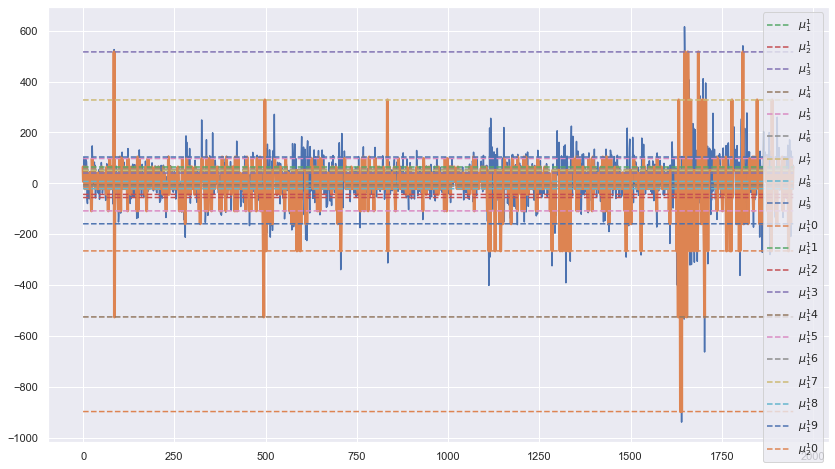

In [206]:
model = GaussianHMM(n_components=20,
                        covariance_type="diag",
                        n_iter=1000)
values = series.reshape(-1,1)
model.fit(values)

labels = model.predict(values)
means = np.zeros_like(values)

for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
#plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

for i in range(model.n_components):
    plt.plot( range(len(values)), model.means_[i, 0] * np.ones(len(values)), '--', label='$\mu^1_{}$'.format(i+1))
plt.legend()

In [ ]:
#Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

Если представить каждую из **скрытых компонент** как **вершины графа**,  

то **ребра этого графа** будут матрицей переходов (**transition probabilities matrix**).   


Вершины(s) такого графа будут обладать несколькими свойствами, например:
- средней (**mean**), 
- стандартным отклонением остатка(**sigma**), получаемому по нормальноу распределению **eps** = np.random.normal(loc=0, scale=sigma)
- формула для нахождения наблюдаемой переменной **y** = mean + s*coef + eps.

По задаче нам нужно сгенерировать путь по вершинам графа,   
и подставить значение **mean** из свойств каждой вершины.  


Для усложнения задания. сгененрирую значение **y** из свойств каждой вершины.

<AxesSubplot:>

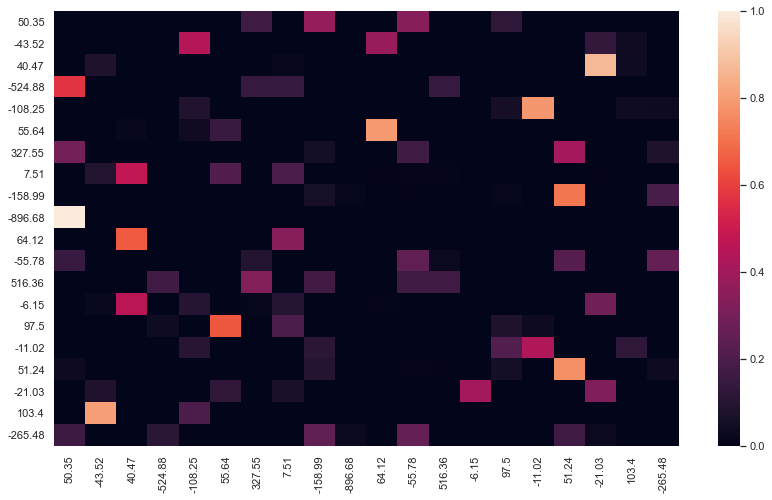

In [218]:
# Матрица переходов - transition probabilities matrix
means = model.means_.ravel()
means = [np.round(j,2) for j in means]
sns.heatmap(model.transmat_, xticklabels=means,yticklabels=means)

In [233]:
# Построю "прогноз"(скорее рандомную генерацию) на 15 шагов вперед.
prob = model.transmat_
components = range(model.n_components)
last_value_class = model.predict( series[-1].reshape(-1, 1) )
array = [last_value_class[0]]

for i in range(15):
    array.append( np.random.choice(components, p=model.transmat_[array[-1]] ) )

array

[10, 2, 17, 7, 5, 10, 2, 17, 5, 5, 10, 2, 17, 17, 17, 17]

In [ ]:
# Подставим вместо скрытой переменой её среднюю mean:
predict_by_means = list(map(lambda x: model.means_[x][0] ,array))

In [250]:
# Подставим вместо скрытой переменой её y = mean coef*s + eps:
predict_by_HMM = list(map(lambda x: model._generate_sample_from_state(x)[0] ,array))

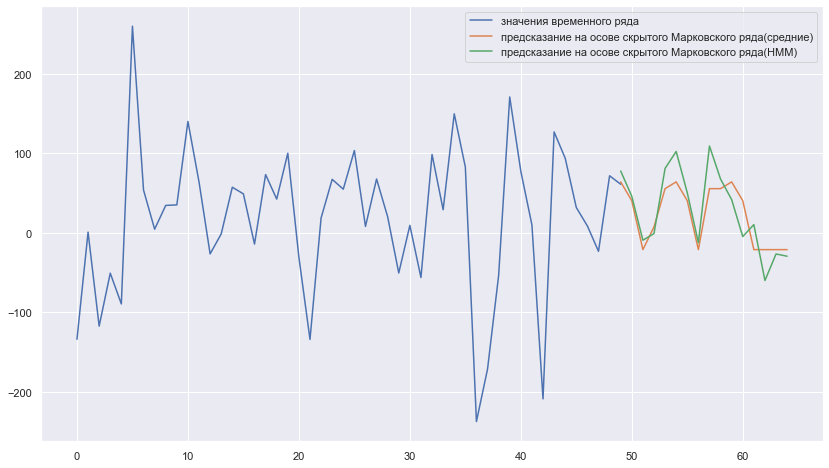

In [251]:
plt.plot(series[-50:],label='значения временного ряда')
plt.plot(range(49,65),predict_by_means,label='предсказание на осове скрытого Марковского ряда(средние)');
plt.plot(range(49,65),predict_by_HMM,label='предсказание на осове скрытого Марковского ряда(HMM)');

plt.legend(loc='best')